## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")

## Check The Dataframe

In [3]:
print(df.head)
print(df['Attrition'].value_counts())

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

## Visualize Attrition Patterns

<function matplotlib.pyplot.show(close=None, block=None)>

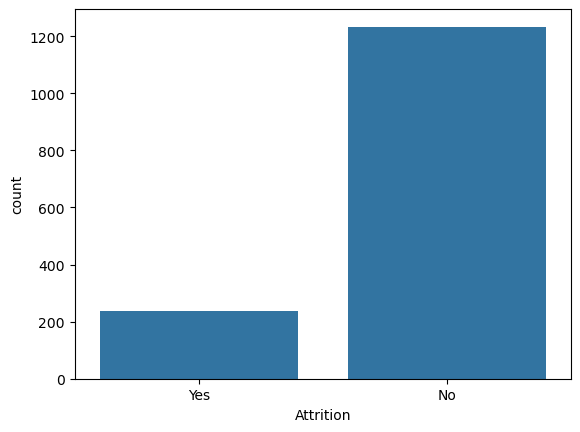

In [4]:
sns.countplot(x="Attrition", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

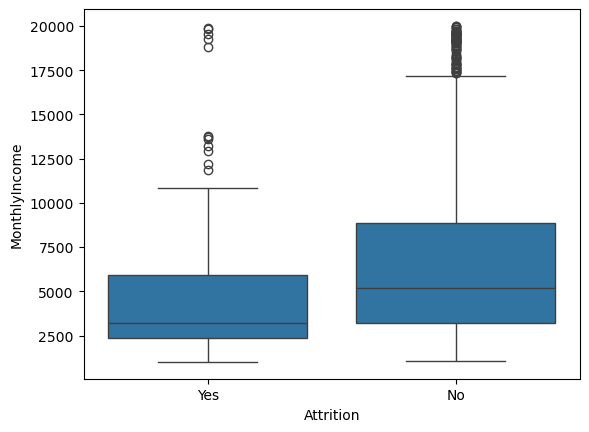

In [5]:
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.show

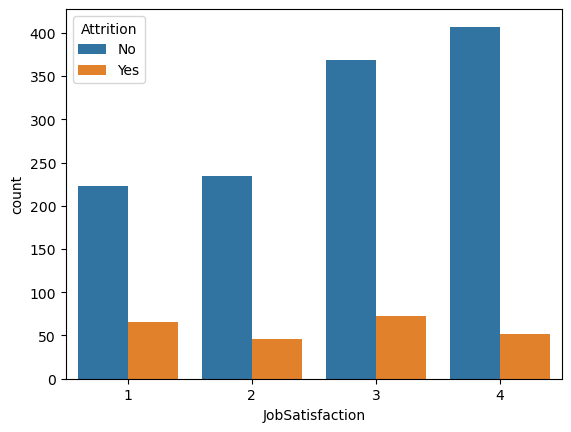

In [6]:
sns.countplot(x="JobSatisfaction", hue="Attrition", data=df)
plt.show()

## Feature Prep

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

## Converts Text to Binary Numbers

In [8]:
df['Attrition_binary'] = df['Attrition'].map({'Yes':1, 'No':0})
df['OverTime'] = df['OverTime'].map({'Yes':1,'No':0})

features = ['Age','MonthlyIncome','JobSatisfaction','OverTime','YearsAtCompany']

In [9]:
x = df[features]
y = df['Attrition_binary']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Train Model

In [11]:
model = LogisticRegression(max_iter=500)

In [12]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [13]:
preds = model.predict(x_test)

In [14]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.33      0.03      0.05        39

    accuracy                           0.86       294
   macro avg       0.60      0.51      0.49       294
weighted avg       0.80      0.86      0.81       294



In [16]:
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))

ROC AUC: 0.709703368526898


In [17]:
coef = pd.DataFrame({'Feature': features, 'Importance': model.coef_[0]})

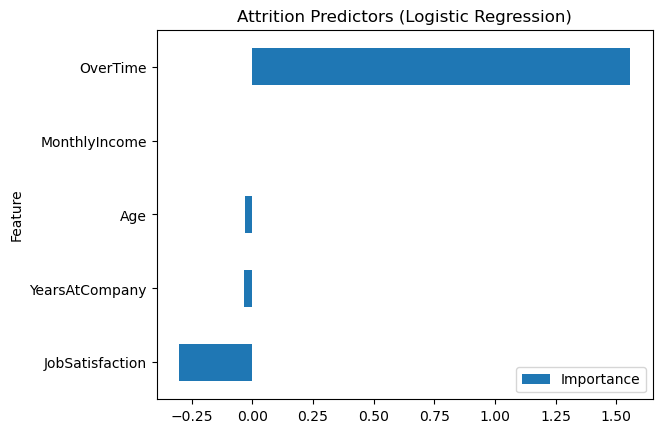

In [18]:
coef.sort_values(by='Importance').plot.barh(x='Feature', y='Importance')
plt.title("Attrition Predictors (Logistic Regression)")
plt.show()